# Forecasting Stock Prices
## Monte Carlo Simulations Based on Historical Data

#### PYTHON VERSION

In [1]:
import sys
print(sys.version)

3.6.5 (default, Jun 27 2018, 08:15:56) 
[GCC 6.3.0 20170516]


### MC Asset Pricing
The basic recursive formula used for the purposes of this exercise:
\begin{align*}
\text{PriceToday}&=\text{PriceYesterday} \times e^r \\
\text{PriceToday}&=\text{PriceYesterday} \times e^{\text{ln}\frac{\text{PriceToday}}{\text{PriceYesterday}}} \\
\end{align*}
where <B>r</B> is the <A HREF="https://en.wikipedia.org/wiki/Rate_of_return"><B>logarithmic return</B></A>.

The aforementioed formula can be further broken down to two components:
\begin{equation*}\text{PriceToday}=\text{PriceYesterday} \times e^{\underbrace{\mu -\frac{\sigma^2}{2}}_{\text{drift}} \quad + \quad \underbrace{\sigma \mathbf{Z}(\text{Rand[0,1]})}_{\text{volatility}}}.\end{equation*}

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the ticker symbol
ticker = 'MSFT'

# Download data using yfinance
data = yf.download(ticker, start='2000-01-01')

# Extract the 'Adj Close' column
data = data[['Adj Close']]

# Calculate log returns
log_returns = np.log(1 + data.pct_change())

# Calculate drift and standard deviation
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

# Ensure drift and stdev are arrays
drift = drift.values
stdev = stdev.values

# Define parameters for simulation
t_intervals = 250
iterations = 100

# Simulate daily returns
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

[*********************100%***********************]  1 of 1 completed


Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [3]:
S0 = data.iloc[-1]
S0

Adj Close    437.109985
Name: 2024-07-19 00:00:00, dtype: float64

Create a variable price_list with the same dimension as the daily_returns matrix. 

In [4]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Set the values on the first row of the price_list array equal to S0.

In [6]:
price_list[0] = S0
price_list

array([[437.10998535, 437.10998535, 437.10998535, ..., 437.10998535,
        437.10998535, 437.10998535],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [7]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [8]:
price_list

array([[437.10998535, 437.10998535, 437.10998535, ..., 437.10998535,
        437.10998535, 437.10998535],
       [448.04323914, 435.10122008, 427.50766193, ..., 428.00359941,
        428.44459419, 444.69188715],
       [445.55044777, 443.64845168, 432.58123427, ..., 433.42624752,
        422.02021376, 438.37597268],
       ...,
       [644.97127948, 618.75058545, 445.45875368, ..., 669.76450659,
        502.50012626, 359.47566232],
       [631.19117534, 607.11596375, 429.66840214, ..., 680.13799961,
        501.40711399, 359.28582469],
       [624.81854569, 612.4035674 , 420.23361618, ..., 674.21357215,
        501.72864321, 355.52741308]])

Finally, plot the obtained price list data.

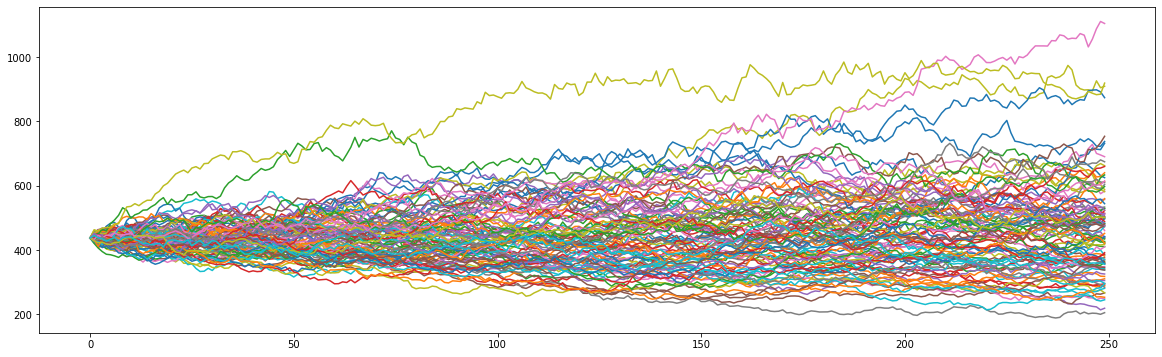

In [9]:
plt.figure(figsize=(20,6))
plt.plot(price_list);